In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

### Dataset

MAESTRO_small is dataset class for piano transcription. You can specify the path of the maestro dataset through *path*. *groups* indicates splits. you can select some of belows and pass it by list of strings.
```
>>train_set.available_groups()
['train', 'validation', 'test', 'debug']
```
when you call the class, it will read all files(audio, midi) and parse them. Here, we will use 'debug' dataset, which is subset of 'train' dataset (first 10 pieces)

In [2]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=None, random_sample=True)

Loading group debug:   0%|          | 0/10 [00:00<?, ?it/s]

Loading 1 group of MAESTRO_small at ../data


Loading group debug: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


In [3]:
example_dataset.available_groups()

['train', 'validation', 'test', 'debug']

### Data types
You can treat it as python list. when you call it with index, \_\_getitem\_\_ fuction will be called.
It will returns python dict, which contains file path, normalized audio, and piano rolls.

Samplerate of the audio is 16000, and we will use hop_size=512 for mel-spectrogram and pianoroll, resulting framerate=16000/512 == 31.25.

In the example below, you length of the audio

In [4]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

data: {'path': '../data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac', 'audio': tensor([-0.0002, -0.0002, -0.0001,  ...,  0.0149,  0.0022, -0.0390]), 'frame': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'onset': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
audio_shape: torch.Size([5411840])
frame_roll_shape: torch.Size([10570, 88])
onset_roll_shape: torch.Size([10570, 88])
HOP_SIZE(512) x piano_roll length(10570): 5411840


### Pianoroll
Pianoroll is array-like representation of notes.
*frame* and *onset* is a tensor, which shape is (*#frames*, *88(pithces)*)  
frame indicates ststain of notes, and onsets indicates the attack of the note.
Let's suppose there is a piano note of pitch p is pressed at time t1, and released at t2.  
Then, frame[t1:t2+1, p] = 1, and onset[t1, p] = 1, and 0 otherwise.


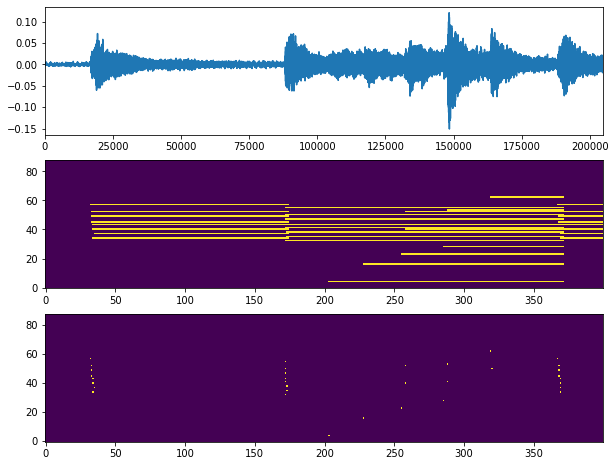

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='bottom')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='bottom')


### sequence_length & random_sample
If we specify the *sequence_length*, the dataset segments the audio into given sequence. when *random_sample=False*, the first segements will be returned. If *random_sample=True*, random location is selected, and the segment is sampled from that position. We will use this attributes to make our training samples stocastic.

if *sequence_length* is not divisible with *HOP_SIZE*, it will be adjusted into proper length by shortening.

In [6]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=10000, random_sample=True)

Loading group debug:   0%|          | 0/10 [00:00<?, ?it/s]

Loading 1 group of MAESTRO_small at ../data


Loading group debug: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


In [7]:
data = example_dataset[1]
print(f'data path: {data["path"]}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

data path: ../data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac
audio_shape: torch.Size([9728])
frame_roll_shape: torch.Size([19, 88])
onset_roll_shape: torch.Size([19, 88])
